# Ablation Analysis

In [1]:
import json
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

RESULTS_DIR = Path("../experiments/results")
LOGS_DIR = Path("../experiments/logs")

1. System-level comparison (baselines vs RAG + LoRA)

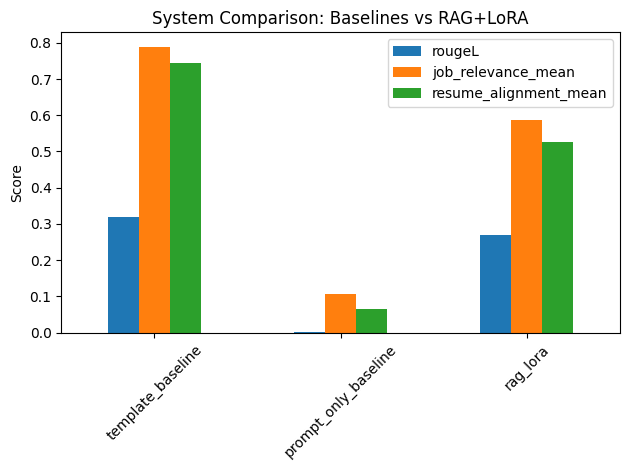

In [2]:
metrics_path = RESULTS_DIR / "metrics.json"
with metrics_path.open() as f:
    all_results = json.load(f)

all_results

df_systems = pd.DataFrame.from_dict(all_results, orient="index")
df_systems

ax = df_systems[["rougeL", "job_relevance_mean", "resume_alignment_mean"]].plot(
    kind="bar", rot=45
)
plt.title("System Comparison: Baselines vs RAG+LoRA")
plt.ylabel("Score")
plt.tight_layout()
plt.show()

2. Hyperparameter Tuning (LoRA rank, learning rate, etc.)

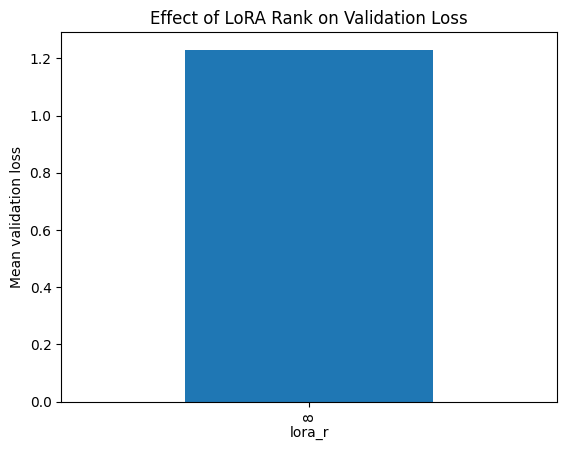

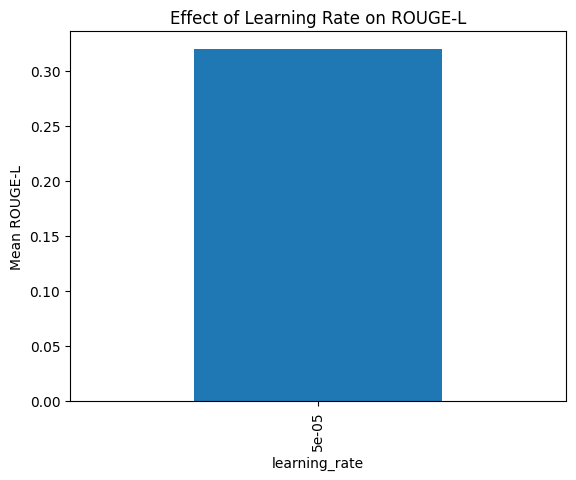

In [ ]:
hparam_path = RESULTS_DIR / "hpram_results.json"
with hparam_path.open() as f:
    hparam_results = json.load(f)

df_hparams = pd.DataFrame.from_dict(hparam_results, orient="index")
df_hparams

if "lora_r" in df_hparams.columns:
    df_hparams.groupby("lora_r")["val_loss"].mean().plot(kind="bar")
    plt.title("Effect of LoRA Rank on Validation Loss")
    plt.ylabel("Mean validation loss")
    plt.show()

if "learning_rate" in df_hparams.columns:
    df_hparams.groupby("learning_rate")["rougeL"].mean().plot(kind="bar")
    plt.title("Effect of Learning Rate on ROUGE-L")
    plt.ylabel("Mean ROUGE-L")
    plt.show()

3. Ablation Study: Impact of RAG and LoRA

We compare four variants:
1. Prompt-only model (no RAG, no LoRA)
2. LoRA fine-tuned model without RAG
3. RAG with base model (no LoRA)
4. RAG with LoRA (our full system)

,rougeL,job_relevance_mean,resume_alignment_mean
prompt_only_baseline,0.000834,0.106379,0.066254
lora_only,0.295387,0.651009,0.575374
rag_only,0.288107,0.556358,0.520624
rag_lora,0.268569,0.585883,0.525232


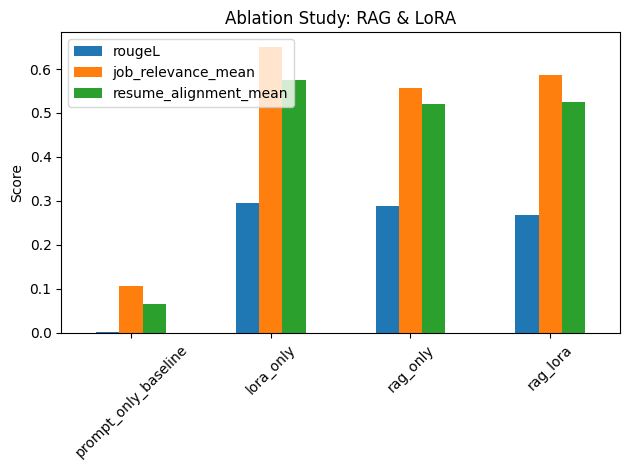

In [ ]:
RESULTS_DIR = Path("../experiments/results")  

metrics_path = RESULTS_DIR / "ablation_results.json"
with metrics_path.open() as f:
    ablation = json.load(f)  

df_ablation = pd.DataFrame.from_dict(ablation, orient="index")

display(df_ablation)

df_ablation[["rougeL", "job_relevance_mean", "resume_alignment_mean"]].plot(
    kind="bar", rot=45
)
plt.title("Ablation Study: RAG & LoRA")
plt.ylabel("Score")
plt.tight_layout()
plt.show()

4. Error Analysis and Qualitative Examples

We examine examples where the RAG + LoRA system still underperforms or makes mistakes, such as:
- Mentioning irrelevant skills.
- Overly generic openings.
- Weak closing paragraphs.

In [ ]:
qual_path = RESULTS_DIR / "qualitative_examples.json"
if qual_path.exists():
    with qual_path.open() as f:
        qual_examples = json.load(f)

    for ex in qual_examples[:3]:
        print("=" * 80)
        print("JOB:\n", ex["job_text"][:600], "\n")
        print("RESUME:\n", ex["resume_text"][:600], "\n")
        print("REFERENCE COVER LETTER:\n", ex["reference"][:600], "\n")
        print("GENERATED COVER LETTER:\n", ex["generated"][:600], "\n")


JOB:
 Job Title: Network Engineer
Hiring Company: Future Networks
Preferred Qualifications: Experience with network security, Cisco Certified 

RESUME:
 Applicant Name: Oliver Brown
Past Experience: Network Engineer at MNO Corp for 3 years
Current Experience: Senior Network Engineer at PQR Inc. for 2 years
Skillsets: Network Security, Cisco, IP Networking, Troubleshooting
Qualifications: BSc in Network Engineering 

REFERENCE COVER LETTER:
 I am excited to apply for the Network Engineer position at Future Networks. I have five years of experience in network engineering, with a focus on network security. I am currently a Senior Network Engineer at PQR Inc., where I manage IP networking and troubleshoot network issues. I am confident that my skills and qualifications make me a strong candidate for this role. I am eager to bring my technical expertise to your team. 

GENERATED COVER LETTER:
 I am excited to apply for the Job Title: Network Engineer position. With the experiences and skill